In [195]:
import pandas as pd
df=pd.read_csv('C:/Users/abhi0/Downloads/Tweets.csv')

In [297]:
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [197]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [198]:
df['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [199]:
df['text'][4]

"@VirginAmerica and it's a really big bad thing about it"

In [200]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [201]:
len(df)

14640

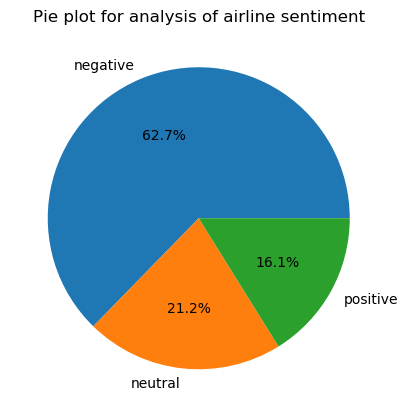

In [202]:
df['airline_sentiment'].value_counts()
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(5,5),dpi=100)
ax.pie(df['airline_sentiment'].value_counts().values,labels=df['airline_sentiment'].value_counts().keys(),autopct='%1.1f%%')
plt.title('Pie plot for analysis of airline sentiment')
plt.show()


**Pie plot showing the distribution of airline sentiment. It seems that 'negative' sentiment was more common compared to the other two.**

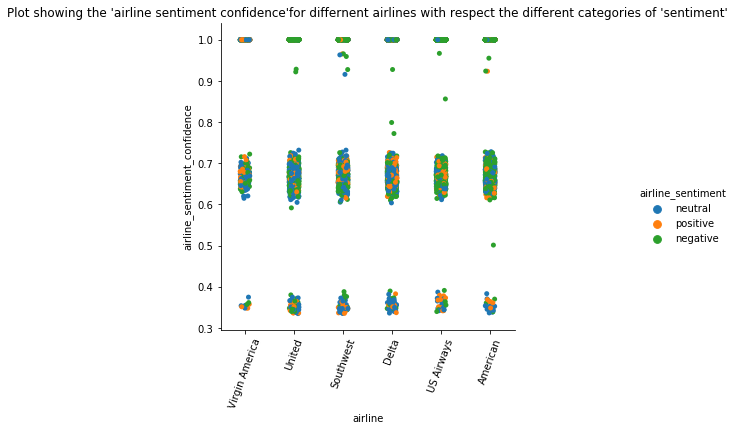

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(y='airline_sentiment_confidence',x='airline',hue='airline_sentiment',data=df)
plt.tick_params(axis='x',rotation=70)
plt.title('Plot showing the \'airline sentiment confidence\'for differnent airlines with respect the different categories of \'sentiment\'')
plt.show()

**It seems that 'higher sentiment confidence' seem to comprise mostly of negative tweets followed by neutral tweets. 'Delta' airlines seem to have the higher number of tweets with confidence of 0.8 and those tweets are generally negative tweets.'United' airlines seem to have the most number of neutral tweets.**

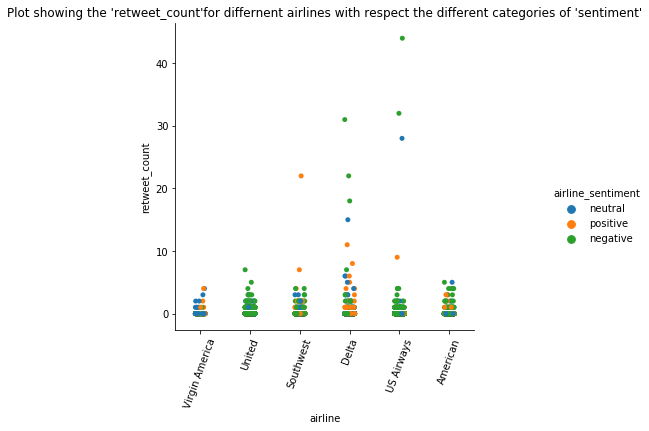

In [204]:
sns.catplot(y='retweet_count',x='airline',hue='airline_sentiment',data=df)
plt.tick_params(axis='x',rotation=70)
plt.title('Plot showing the \'retweet_count\'for differnent airlines with respect the different categories of \'sentiment\'')
plt.show()

**'US Airways' followed by 'Delta' seem to have the highest retweet count and the higher end of the number of retweets seem to be more generally negative. Only for 'Southwest' the tweets with large re-tweet count seem to be positive. 'American airlines','Virgin America' and 'United' don't seem to have a high re-tweet count** 

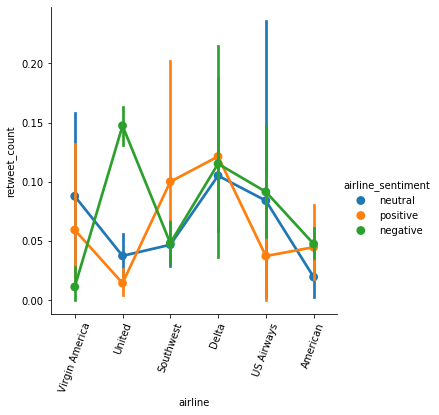

In [205]:
sns.catplot(y='retweet_count',x='airline',hue='airline_sentiment',kind='point',data=df)
plt.tick_params(axis='x',rotation=70)
plt.show()

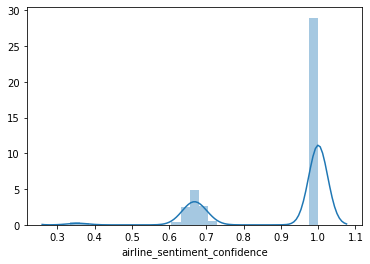

In [206]:
sns.distplot(df['airline_sentiment_confidence'],hist=True)
plt.show()

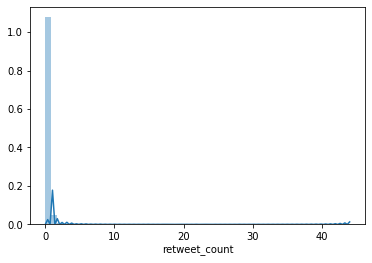

In [207]:
sns.distplot(df['retweet_count'],hist=True)
plt.show()

**Negatively skewed distribution for 'retweet_count'**

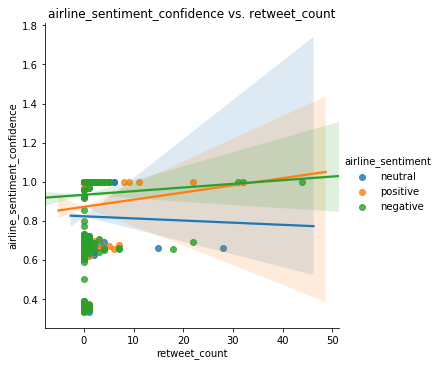

In [208]:
sns.lmplot(x='retweet_count',y='airline_sentiment_confidence',hue='airline_sentiment',data=df)
plt.title('airline_sentiment_confidence vs. retweet_count')
plt.show()

**No relation between 'airline_sentiment_confidence' and retweet_count.**

In [230]:
import torch

In [235]:
from fastai.text import *
import numpy as np
from sklearn.feature_selection import chi2


In [236]:
sPrime=map(lambda s:s.replace('\n',''),df['text'])                               

In [237]:
temp=[]
tempPrime=[]
for count,i in enumerate(list(sPrime)):
    temp.append(i.split(' '))
    tempPrime.append(' '.join(temp[count]))



['@VirginAmerica What @dhepburn said.', "@VirginAmerica plus you've added commercials to the experience... tacky.", "@VirginAmerica I didn't today... Must mean I need to take another trip!", '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse', "@VirginAmerica and it's a really big bad thing about it", "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.it's really the only bad thing about flying VA", '@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)', '@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP', "@virginamerica Well, I didn't…but NOW I DO! :-D", "@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.", '@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24', '@VirginAmerica I &lt;3 pretty graphics. so much be

In [258]:
#For removing the 'http://'link:
tempAlpha=[]
temp1=[]
temp2=''
for i in tempPrime:
    temp1=re.findall('\S*[\w]+://[\w]+\.[\w]+\/[\w]+',i)
    if temp1!=[]:
        for j in range(len(temp1)):
            temp2=i.replace(temp1[j],'')
            i=temp2
    else:
        temp2=i
    tempAlpha.append(temp2)
    
#For removing the hashtags:
tempTilda=[]
temp1=[]
temp2=''
for i in tempAlpha:
    temp1=re.findall('#[\w]+',i)
    if temp1!=[]:
        for j in range(len(temp1)):
            temp2=i.replace(temp1[j],'')
            i=temp2 
    else:
        temp2=i
    tempTilda.append(temp2)

#For removing the '@airlines':
tempTweets=[]
temp1=[]
temp2=''
for i in tempTilda:
    temp1=re.findall('@[\w]+',i)
    if temp1!=[]:
        for j in range(len(temp1)):
            temp2=i.replace(temp1[j],'')
            i=temp2
    else:
        temp2=i
    print(temp2)
    tempTweets.append(temp2)
    


 What  said.
 plus you've added commercials to the experience... tacky.
 I didn't today... Must mean I need to take another trip!
 it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
 and it's a really big bad thing about it
 seriously would pay $30 a flight for seats that didn't have this playing.it's really the only bad thing about flying VA
 yes, nearly every time I fly VX this “ear worm” won’t go away :)
 Really missed a prime opportunity for Men Without Hats parody, there. 
 Well, I didn't…but NOW I DO! :-D
 it was amazing, and arrived an hour early. You're too good to me.
 did you know that suicide is the second leading cause of death among teens 10-24
 I &lt;3 pretty graphics. so much better than minimal iconography. :D
 This is such a great deal! Already thinking about my 2nd trip to  &amp; I haven't even gone on my 1st trip yet! ;p
  I'm flying your   skies again! U take all the  away from travel 
 Thanks!
 SFO-PDX sc

In [ ]:
#Most frequent words in each category and word cloud:
""""
stopWords=['the','from','of','in','on','within','into','...']
temp1=[]
temp=[]
tempDictPositive=dict()
tempDictNegative=dict()
tempDictNeutral=dict()

for i in range(len(tempTweets)):
    temp=[]
    temp=tempTweets[i].split(' ')
    for j in temp:
        if list(df['airline_sentiment'])[i]=='positive':
            print((df['airline_sentiment'])[i])
            if j not in stopWords:
                if j not in tempDictPositive.keys():
                    tempDictPositive.update({j:1})
                else:
                    tempDictPositive[j]+=1
        elif list(df['airline_sentiment'])[i]=='negative':
            if j not in stopWords:
                if j not in tempDictNegative.keys():
                    tempDictNegative.update({j:1})
                else:
                    tempDictNegative[j]+=1
        elif list(df['airline_sentiment'])[i]=='neutral':
            if j not in stopWords:
                if j not in tempDictNeutral.keys():
                    tempDictNeutral.update({j:1})
                else:
                    tempDictNeutral[j]+=1
            
    

""""

In [259]:
#Doing label-encoding for the categorical labels:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
tempLabels=le.fit_transform(list(df['airline_sentiment']))
print(tempLabels)

[1 2 1 0 ... 0 1 0 1]


In [260]:
#Cleaning the empty tweets:
tweets=[]
labels=[]
for i in range(len(tempTweets)):
    if tempTweets[i]!='':
        tweets.append(tempTweets[i])
        labels.append(tempLabels[i])
        print(tempTweets[i],tempLabels[i])

 What  said. 1
 plus you've added commercials to the experience... tacky. 2
 I didn't today... Must mean I need to take another trip! 1
 it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse 0
 and it's a really big bad thing about it 0
 seriously would pay $30 a flight for seats that didn't have this playing.it's really the only bad thing about flying VA 0
 yes, nearly every time I fly VX this “ear worm” won’t go away :) 2
 Really missed a prime opportunity for Men Without Hats parody, there.  1
 Well, I didn't…but NOW I DO! :-D 2
 it was amazing, and arrived an hour early. You're too good to me. 2
 did you know that suicide is the second leading cause of death among teens 10-24 1
 I &lt;3 pretty graphics. so much better than minimal iconography. :D 2
 This is such a great deal! Already thinking about my 2nd trip to  &amp; I haven't even gone on my 1st trip yet! ;p 2
  I'm flying your   skies again! U take all the  away from tr

In [263]:
df_tweets=pd.Series(tweets)
df_labels=pd.Series(labels)

In [270]:
dfPrime=pd.concat([df_tweets,df_labels],axis=1)
dfPrime.head()

0  1
0                                        What  said.  1
1   plus you've added commercials to the experien...  2
2   I didn't today... Must mean I need to take an...  1
3   it's really aggressive to blast obnoxious "en...  0
4           and it's a really big bad thing about it  0

In [272]:
#Creating training and validation splits:
from sklearn.model_selection import train_test_split
df_trn, df_val = train_test_split(dfPrime, stratify = dfPrime[1], test_size = 0.3)
df_trn.shape, df_val.shape

((10248, 2), (4392, 2))

In [273]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")
# Classifier model data
data_clas = TextClasDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "", vocab=data_lm.train_ds.vocab, bs=32)

C:\Users\abhi0\Anaconda3\lib\site-packages\fastai\data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
 I was on a flight for tomorrow and my reservation is coming up.  Help me!,  Could you tell me if this bag would be accepted as a personal item ? Can i bring one carry-on bag plus this? ,  we saw one, he was as useless as the tsa agents who inspected my shoes,  thank you! It's # 1875 from BWI, keep seeing different stats, from delayed to awaiting take off to delayed...,  you may think I'm joking or blowing it out of proportion but the last 8 united flights have been delayed or significantly Late Flight....
  if getattr(ds, 'warn', False): warn(ds.warn)


In [274]:
data_clas.show_batch()

C:\Users\abhi0\Anaconda3\lib\site-packages\fastai\text\data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:766.)
  idx_min = (t != self.pad_idx).nonzero().min()


In [275]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02
Min loss divided by 10: 3.31E-01


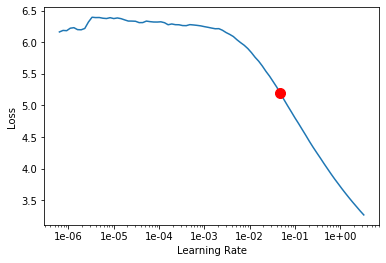

In [276]:
#Using the learning rate finder to find the best learning rate:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [277]:
learn.fit_one_cycle(2, min_grad_lr)

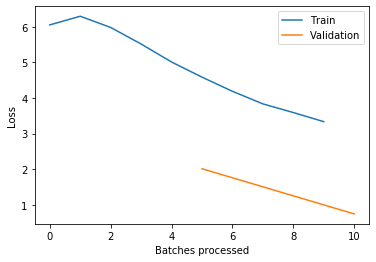

In [278]:
#Plot of training and validation loss
learn.recorder.plot_losses()

In [283]:
#Gradual unfreezing - training first couple of layers:
learn.freeze_to(-2)
learn.fit_one_cycle(10, slice(5e-3, 2e-3), moms=(0.8,0.7))

In [296]:
#Un-freezing all the layers and training the model at a lower learning rate. 
learn.unfreeze()
learn.fit_one_cycle(4, slice(2e-3/100, 2e-3), moms=(0.8,0.7))

Accuracy does not change much. Unfreezing is not that helpful. 

In [295]:
#Exporting the weights
learn.export()